In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 2. Load the dataset
data = pd.read_csv('colorado_motor_vehicle_sales.csv') 


In [3]:
data.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [4]:
print(f"Missing values:\n{data.isnull().sum()}\n")

Missing values:
year       0
quarter    0
county     0
sales      0
dtype: int64



In [5]:
# 3. Data Preparation
# Create a Date column from year and quarter
data['Date'] = pd.to_datetime(data['year'].astype(str) + 'Q' + data['quarter'].astype(str))

# Convert sales to numeric
data['sales'] = pd.to_numeric(data['sales'], errors='coerce')

# Drop missing values
data.dropna(inplace=True)

# Set Date as index and aggregate by quarter
data.set_index('Date', inplace=True)
quarterly_sales = data.resample('Q').sum()

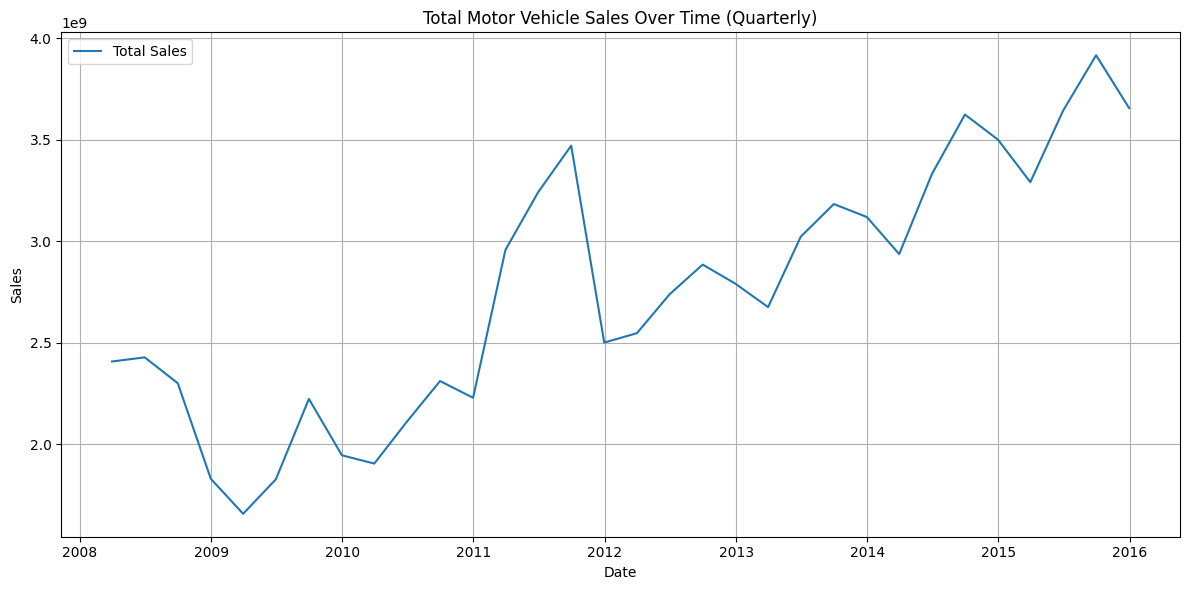

In [6]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales.index, quarterly_sales['sales'], label='Total Sales')
plt.title('Total Motor Vehicle Sales Over Time (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


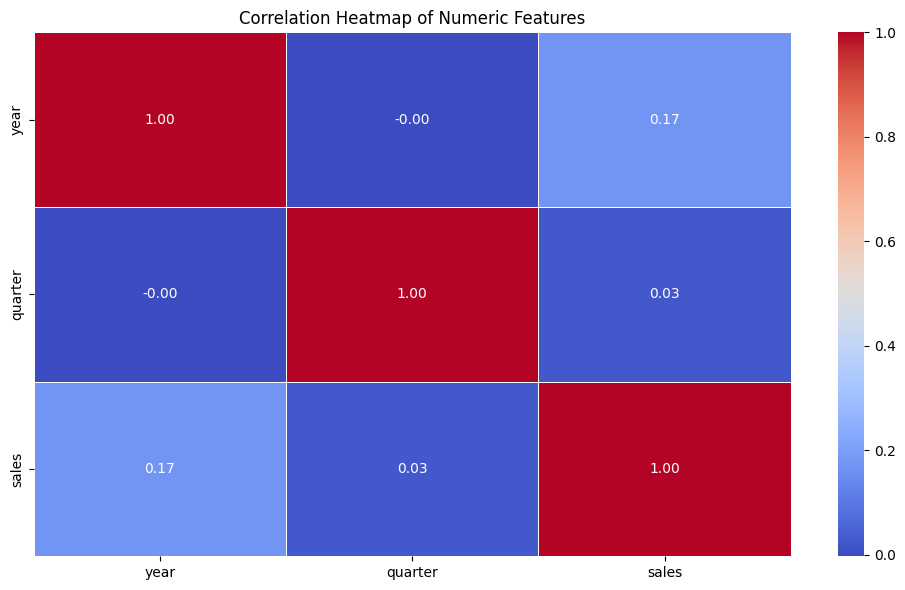

In [7]:
# ===== Correlation Heatmap =====

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

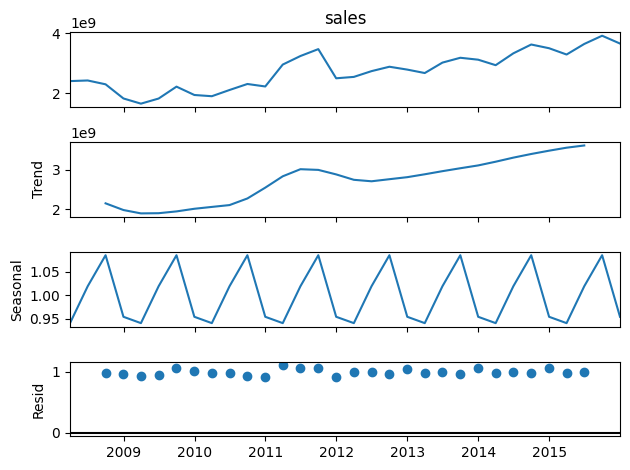

In [8]:
# 5. Seasonal Decomposition
decomposition = seasonal_decompose(quarterly_sales['sales'], model='multiplicative', period=4)
decomposition.plot()
plt.tight_layout()
plt.show()


In [9]:
# 6. ARIMA Modeling
model = ARIMA(quarterly_sales['sales'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 4 quarters
forecast = model_fit.forecast(steps=4)
forecast_index = pd.date_range(start=quarterly_sales.index[-1] + pd.offsets.QuarterEnd(), periods=4, freq='Q')


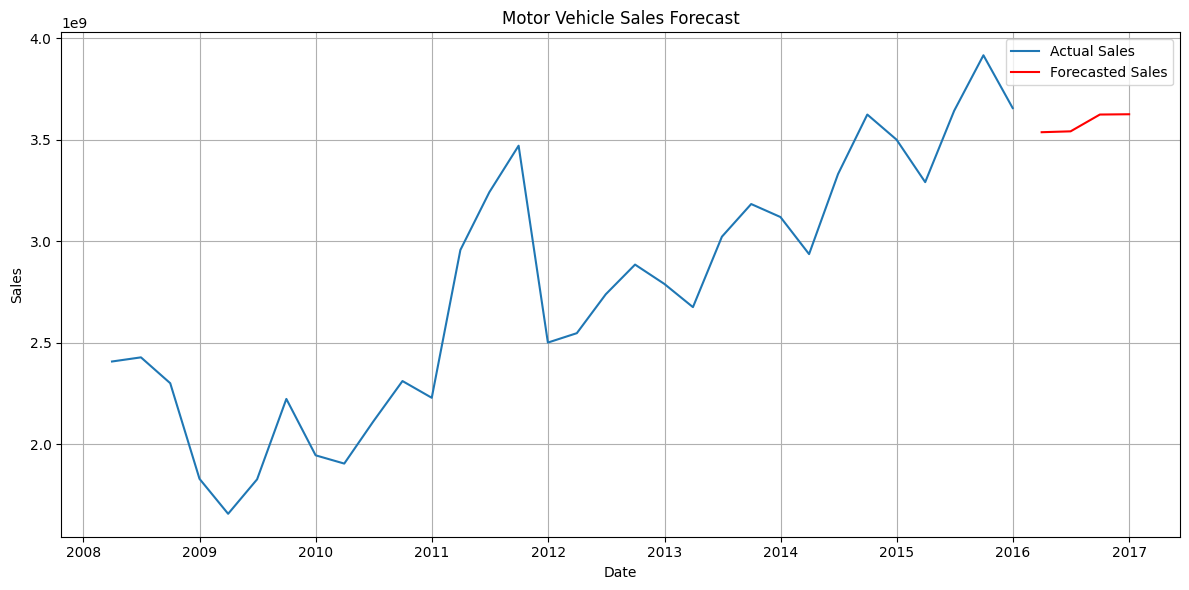

In [10]:
# 7. Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales.index, quarterly_sales['sales'], label='Actual Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Motor Vehicle Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

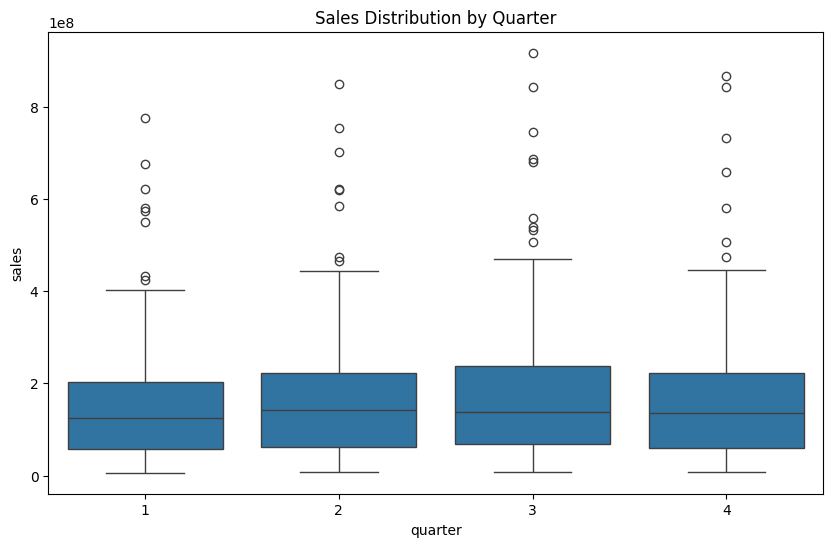

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='quarter', y='sales')
plt.title('Sales Distribution by Quarter')
plt.show()

In [12]:
import ipywidgets as widgets

def plot_sales_by_county(df, year, quarter):
    filtered_df = df[(df['year'] == year) & (df['quarter'] == quarter)]
    county_sales = filtered_df.groupby('county')['sales'].sum().reset_index()
    county_sales_sorted = county_sales.sort_values('sales', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=county_sales_sorted, x='county', y='sales', palette='viridis')
    plt.title(f'Sales by County for {year} Q{quarter}')
    plt.xticks(rotation=90)
    plt.ylabel('Total Sales')
    plt.xlabel('County')
    plt.show()

year_widget = widgets.IntSlider(min=data['year'].min(), max=data['year'].max(), step=1, description='Year:')
quarter_widget = widgets.IntSlider(min=data['quarter'].min(), max=data['quarter'].max(), step=1, description='Quarter:')
widgets.interact(lambda year, quarter: plot_sales_by_county(data, year, quarter), year=year_widget, quarter=quarter_widget)



interactive(children=(IntSlider(value=2008, description='Year:', max=2015, min=2008), IntSlider(value=1, descr…

<function __main__.<lambda>(year, quarter)>

In [13]:
report = (
    "\n" + "=" * 55 +
    "\n Colorado Motor Vehicle Sales Data Analysis Report\n" +
    "=" * 55 + "\n\n"

    "  Data Overview\n"
    "------------------------------\n"
    f"• Time Frame                       : {quarterly_sales.index.min().date()} to {quarterly_sales.index.max().date()}\n"
    f"• Total Quarterly Data Points     : {len(quarterly_sales)}\n\n"

    "  Exploratory Data Analysis\n"
    "------------------------------\n"
    "• Visualized total sales across quarters.\n"
    "• Observed patterns indicating seasonality.\n\n"

    "  Statistical Analysis\n"
    "------------------------------\n"
    "• Seasonal decomposition (multiplicative model).\n"
    "• Trends and cycles identified consistently across years.\n\n"

    "  Predictive Modeling\n"
    "------------------------------\n"
    "• Model Used                      : ARIMA(5,1,0)\n"
    "• Forecast Horizon                : 4 Quarters\n"
    f"• Mean Squared Error (MSE)        : {mse:.2e}\n"
    "• Visual comparison plotted.\n\n"

    "  Key Conclusions\n"
    "------------------------------\n"
    "• Strong seasonality supports forecasting techniques.\n"
    "• ARIMA provides useful short-term sales predictions.\n"
    "• Results can inform strategic planning & inventory.\n\n"

  
)

print(report)


NameError: name 'mse' is not defined